# House Prices: Advanced Regression Techniques
### [Link to Kaggle Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating:** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting:** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting:** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating:** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting:** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# 1. Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 2. Acquire training and test data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
from xgboost import XGBRegressor

# Feature selection
from boruta import BorutaPy



In [2]:
!pip freeze > requirements.txt

In [3]:
df_train = pd.read_csv('data/train.csv')  
df_test = pd.read_csv('data/test.csv')
combine = [df_train, df_test]

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
df_test.shape

(1459, 80)

In [7]:
df_test.sort_values(by='Id').head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [8]:
df_test.interpolate().isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt         0
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond

In [9]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 3. Feature Engineering

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.1 MSSubClass 
Change feature values to be represented by number from 1 and up.

**Feature Description:**  
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
**Feature Engineering:**
Create a binary feature where 1 is 1 story and 0 is more than 1 story.

In [11]:
df_train.MSSubClass.isna().sum()

0

In [12]:
df_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [13]:
one_story_nums = [20, 30, 40, 120]

def mssubclass_feateng(input):
    if input in one_story_nums:
        return 1
    else:
        return 0

In [14]:
df_train['MSSubClass_1story'] = df_train.apply(lambda x: mssubclass_feateng(x.MSSubClass), axis=1)
df_test['MSSubClass_1story'] = df_test.apply(lambda x: mssubclass_feateng(x.MSSubClass), axis=1)

In [15]:
df_train.MSSubClass_1story.value_counts()

0    764
1    696
Name: MSSubClass_1story, dtype: int64

In [16]:
df_train.MSSubClass_1story.value_counts()

0    764
1    696
Name: MSSubClass_1story, dtype: int64

In [17]:
df_train['MSSubClass_1story'] = df_train['MSSubClass_1story'].astype('category')
df_test['MSSubClass_1story'] = df_test['MSSubClass_1story'].astype('category')

In [18]:
df_train.drop('MSSubClass', axis=1, inplace=True)
df_test.drop('MSSubClass', axis=1, inplace=True)

df_train.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


## 3.2 MSZoning

**Feature Description:**  
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [19]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [20]:
df_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [21]:
### Create dummies to handle categorical feature

In [22]:
df_train = pd.concat([df_train.drop('MSZoning', axis=1), pd.get_dummies(df_train['MSZoning'], prefix='MSZoning')], axis=1)
df_test = pd.concat([df_test.drop('MSZoning', axis=1), pd.get_dummies(df_test['MSZoning'], prefix='MSZoning')], axis=1)


In [23]:
df_train.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,0,0,0,0,1,0
1,2,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,1,0,0,0,1,0
2,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,0,0,0,0,1,0
3,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,0,0,0,0,1,0
4,5,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,0,0,0,0,1,0


## 3.3 LotFrontage

In [24]:
df_train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
df_train.LotFrontage.isna().sum()

259

In [26]:
df_test.LotFrontage.isna().sum()

227

### Drop LotFrontage
Drop this feature as there are 259 NaNs which is close to 20% of the samples.

An alternative would be to estimate the LotFrontage based on the LotArea.

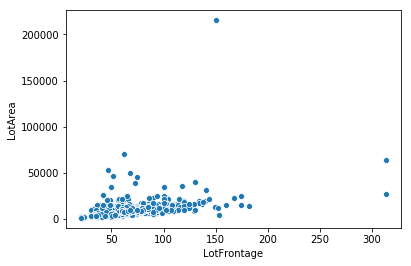

In [27]:
sns.scatterplot(x='LotFrontage', y='LotArea', data=df_train)

In [28]:
df_train.drop('LotFrontage', axis=1, inplace=True)
df_test.drop('LotFrontage', axis=1, inplace=True)

## 3.4 Lot Area

In [29]:
df_train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

**Remove outliers**

In [30]:
df_train = df_train[df_train['LotArea'] < 150000]
df_test = df_test[df_test['LotArea'] < 150000]

In [31]:
df_train.LotArea.describe()

count      1457.000000
mean      10168.609472
std        6281.850623
min        1300.000000
25%        7540.000000
50%        9473.000000
75%       11600.000000
max      115149.000000
Name: LotArea, dtype: float64

## 3.5 Street
Drop this feature as 99.7% has the same value.

In [32]:
df_train.Street.value_counts()

Pave    1452
Grvl       5
Name: Street, dtype: int64

In [33]:
df_train.drop('Street', axis=1, inplace=True)
df_test.drop('Street', axis=1, inplace=True)

## 3.6 Alley

In [34]:
df_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [35]:
df_train.Alley.isna().sum()

1366

**Drop Alley feature as 1366 of 1452 are NaNs**

In [36]:
df_train.drop('Alley', axis=1, inplace=True)
df_test.drop('Alley', axis=1, inplace=True)

## 3.7 LotShape

**Feature Description**  
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [37]:
df_train.LotShape.value_counts()

Reg    925
IR1    483
IR2     40
IR3      9
Name: LotShape, dtype: int64

In [38]:
df_train.LotShape.isna().sum()

0

**Replace LotShape with binary feature LotShape_regular**

In [39]:
df_train['LotShape_regular'] = df_train.apply(lambda x: 1 if x.LotShape == "Reg" else 0, axis=1)
df_test['LotShape_regular'] = df_test.apply(lambda x: 1 if x.LotShape == "Reg" else 0, axis=1)

In [40]:
df_train.LotShape_regular.value_counts()

1    925
0    532
Name: LotShape_regular, dtype: int64

In [41]:
df_train.drop('LotShape_regular', axis=1, inplace=True)
df_test.drop('LotShape_regular', axis=1, inplace=True)

## 3.8 Land Contour
**Feature Description**  
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [42]:
df_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      49
Low      34
Name: LandContour, dtype: int64

In [43]:
df_train.LandContour.isna().sum()

0

In [44]:
df_train['LandContour_level'] = df_train.apply(lambda x: 1 if "Lvl" in x.LandContour else 0, axis=1)
df_test['LandContour_level'] = df_test.apply(lambda x: 1 if "Lvl" in x.LandContour else 0, axis=1)


In [45]:
df_train.LandContour_level.value_counts()

1    1311
0     146
Name: LandContour_level, dtype: int64

In [46]:
df_train.drop('LandContour', axis=1, inplace=True)
df_test.drop('LandContour', axis=1, inplace=True)

## 3.9 Utilities
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [47]:
df_train.Utilities.value_counts()

AllPub    1456
NoSeWa       1
Name: Utilities, dtype: int64

**Drop this feature as all but one sample are the same**

In [48]:
df_train.drop('Utilities', axis=1, inplace=True)
df_test.drop('Utilities', axis=1, inplace=True)

## 3.10 LotConfig
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [49]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [50]:
df_train.LotConfig.isna().sum()

0

In [51]:
df_train['LotConfig'] = df_train.apply(lambda x: x.LotConfig[:2] if "FR" in x.LotConfig else x.LotConfig, axis=1)
df_test['LotConfig'] = df_test.apply(lambda x: x.LotConfig[:2] if "FR" in x.LotConfig else x.LotConfig, axis=1)

In [52]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR           51
Name: LotConfig, dtype: int64

In [53]:
df_train = pd.concat([df_train.drop('LotConfig', axis=1), pd.get_dummies(df_train['LotConfig'], prefix='LotConfig')], axis=1)
df_test = pd.concat([df_test.drop('LotConfig', axis=1), pd.get_dummies(df_test['LotConfig'], prefix='LotConfig')], axis=1)

## 3.11 LandSlope
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [54]:
df_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      10
Name: LandSlope, dtype: int64

In [55]:
df_train.LandSlope.isna().sum()

0

In [56]:
df_train = pd.concat([df_train.drop('LandSlope', axis=1), pd.get_dummies(df_train['LandSlope'], prefix='LandSlope')], axis=1)
df_test = pd.concat([df_test.drop('LandSlope', axis=1), pd.get_dummies(df_test['LandSlope'], prefix='LandSlope')], axis=1)


## 3.12 Neighborhood
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [57]:
df_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     27
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [58]:
df_train = pd.concat([df_train.drop('Neighborhood', axis=1), pd.get_dummies(df_train['Neighborhood'], prefix='Neighborhood')], axis=1)
df_test = pd.concat([df_test.drop('Neighborhood', axis=1), pd.get_dummies(df_test['Neighborhood'], prefix='Neighborhood')], axis=1)

## 3.13 MasVnrArea
MasVnrArea: Masonry veneer area in square feet

In [59]:
df_train.MasVnrArea.isna().sum()

8

**Set all NaN values to mean**

In [60]:
MasVnrArea_mean = df_train.MasVnrArea.mean()
MasVnrArea_mean

103.57418909592823

In [61]:
df_train['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)
df_test['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)

In [62]:
df_train.MasVnrArea.isna().sum()

0

## 3.14 Condition1: Proximity to various conditions
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [63]:
df_train.Condition1.value_counts()

Norm      1257
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [64]:
df_train['Condition1_Norm'] = df_train.apply(lambda x: 1 if x.Condition1 =='Norm' else 0, axis=1)
df_test['Condition1_Norm'] = df_test.apply(lambda x: 1 if x.Condition1 =='Norm' else 0, axis=1)

In [65]:
df_train[['Condition1', 'Condition1_Norm']];

In [66]:
df_train.drop('Condition1', axis=1, inplace=True)
df_test.drop('Condition1', axis=1, inplace=True)

## 3.15 Condition2: Proximity to various conditions (if more than one is present)

       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [67]:
df_train.Condition2.value_counts()

Norm      1442
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [68]:
df_train.drop('Condition2', axis=1, inplace=True)
df_test.drop('Condition2', axis=1, inplace=True)

## 3.16 BldgType: Type of dwelling
       1Fam	  Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	 Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [69]:
df_train.BldgType.isna().sum()

0

In [70]:
df_train.BldgType.value_counts()

1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [71]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.BldgType, prefix='BldgType')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.BldgType, prefix='BldgType')], axis=1)

In [72]:
df_train.drop('BldgType', axis=1, inplace=True)
df_test.drop('BldgType', axis=1, inplace=True)

## 3.17 HouseStyle: Style of dwelling
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	  Split Level

In [73]:
df_train.HouseStyle.value_counts()

1Story    725
2Story    445
1.5Fin    152
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [74]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.HouseStyle, prefix='HouseStyle')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.HouseStyle, prefix='HouseStyle')], axis=1)

In [75]:
df_train.drop('HouseStyle', axis=1, inplace=True)
df_test.drop('HouseStyle', axis=1, inplace=True)

## 3.18 OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [76]:
df_train.OverallQual.value_counts()

5     396
6     373
7     318
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [77]:
df_train.OverallQual.isna().sum()

0

In [78]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.OverallQual, prefix='OverallQual')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.OverallQual, prefix='OverallQual')], axis=1)

In [79]:
df_train.head()

,Id,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,8450,Reg,7,5,2003,2003,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,1,0,0,0
1,2,9600,Reg,6,8,1976,1976,Gable,CompShg,MetalSd,...,0,0,0,0,0,1,0,0,0,0
2,3,11250,IR1,7,5,2001,2002,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,1,0,0,0
3,4,9550,IR1,7,5,1915,1970,Gable,CompShg,Wd Sdng,...,0,0,0,0,0,0,1,0,0,0
4,5,14260,IR1,8,5,2000,2000,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0


## 3.19 OverallCond: Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [80]:
df_train.OverallCond.value_counts()

5    820
6    251
7    204
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [81]:
df_train.OverallCond.isna().sum()

0

In [82]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.OverallCond, prefix='OverallCond')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.OverallCond, prefix='OverallCond')], axis=1)

## 3.20 YearBuilt
Original construction date

In [83]:
def YearBuilt_ranges(year):
    if year <= 1900:
        built_range = 'pre_1900'
    elif year > 1900 and year <= 1925:
        built_range = '1900_1925'
    elif year > 1925 and year <= 1950:
        built_range = '1925_1950'
    elif year > 1950 and year <= 1975:
        built_range = '1950_1975'
    elif year > 1975 and year <= 2000:
        built_range = '1975_2000'
    elif year > 2000:
        built_range = 'post_2000'
        
    return built_range

In [84]:
df_train['YearBuilt_range'] = df_train.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)
df_test['YearBuilt_range'] = df_test.apply(lambda x: YearBuilt_ranges(x.YearBuilt), axis=1)

In [85]:
df_train[['YearBuilt_range']];

In [86]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.YearBuilt_range, prefix='YearBuilt_range')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.YearBuilt_range, prefix='YearBuilt_range')], axis=1)

In [87]:
df_train['Age'] = df_train.apply(lambda x: 2010 - x.YearBuilt, axis=1)
df_test['Age'] = df_train.apply(lambda x: 2010 - x.YearBuilt, axis=1)

In [88]:
df_train.drop('YearBuilt', axis=1, inplace=True)

## 3.21 YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

In [89]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 4. Analysis

## 4.1 Correlation Matrix

In [90]:
cols = df_train.columns.tolist()
n = int(cols.index('SalePrice'))
cols =  cols[:n] + cols[n+1:] + [cols[n]]
df_train = df_train[cols]

In [91]:
corr_mat = df_train.corr()

In [92]:
corr_mat[corr_mat['SalePrice'].abs().sort_values(ascending=False) > 0.4]

/Users/bjornar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OverallCond_8,OverallCond_9,YearBuilt_range_1900_1925,YearBuilt_range_1925_1950,YearBuilt_range_1950_1975,YearBuilt_range_1975_2000,YearBuilt_range_post_2000,YearBuilt_range_pre_1900,Age,SalePrice
OverallQual,-0.028531,0.168342,1.000000,-0.091528,0.551388,0.411108,0.240500,-0.061452,0.308474,0.538950,...,-0.071338,0.060252,-0.193153,-0.241312,-0.373741,0.161448,0.557836,-0.043888,-0.572544,0.792692
YearRemodAdd,-0.022515,0.043123,0.551388,0.072878,1.000000,0.177465,0.130792,-0.064566,0.179759,0.293817,...,0.100153,0.096989,-0.192252,-0.288128,-0.350092,0.153318,0.574521,-0.039938,-0.593536,0.510137
MasVnrArea,-0.049498,0.155002,0.411108,-0.129936,0.177465,1.000000,0.265205,-0.070453,0.113051,0.364161,...,-0.087813,-0.006260,-0.184970,-0.150313,-0.025951,0.111769,0.178733,-0.075863,-0.315745,0.476810
TotalBsmtSF,-0.012457,0.329378,0.538950,-0.171848,0.293817,0.364161,0.520458,0.097513,0.419186,1.000000,...,-0.094538,-0.048021,-0.192150,-0.250520,-0.057197,0.056336,0.339858,-0.056458,-0.393309,0.611589
1stFlrSF,0.013404,0.394927,0.477221,-0.144803,0.242967,0.343890,0.443510,0.090269,0.321395,0.818637,...,-0.096396,-0.014357,-0.185624,-0.204656,-0.005773,0.043250,0.241378,0.005628,-0.283408,0.604042
GrLivArea,0.010232,0.368518,0.593667,-0.080651,0.288094,0.389813,0.206555,-0.013002,0.241473,0.453754,...,-0.065848,0.073418,-0.036529,-0.137490,-0.253105,0.157198,0.198318,0.136001,-0.199788,0.708303
FullBath,0.007261,0.156720,0.551271,-0.195033,0.440255,0.275877,0.056504,-0.079921,0.290267,0.322441,...,-0.095532,-0.004207,-0.159170,-0.211372,-0.367292,0.245877,0.401835,0.027778,-0.469080,0.560216
TotRmsAbvGrd,0.028321,0.272067,0.427525,-0.057659,0.192587,0.280648,0.042865,-0.038620,0.251770,0.284513,...,-0.041214,0.057616,0.027899,-0.122843,-0.181391,0.058551,0.160036,0.153089,-0.095893,0.533438
Fireplaces,-0.015335,0.313648,0.399136,-0.025652,0.114573,0.248183,0.255800,0.039853,0.054462,0.335601,...,-0.068715,0.057651,-0.126699,-0.004552,-0.067256,0.105780,0.073841,-0.059715,-0.149709,0.464095
GarageYrBlt,-0.001390,-0.003546,0.548059,-0.323967,0.643092,0.253051,0.155584,-0.086832,0.190350,0.325362,...,-0.165476,-0.054786,-0.391980,-0.397162,-0.312461,0.242421,0.642033,-0.098023,-0.825653,0.489781


In [93]:
correlated_cols = list(corr_mat[corr_mat.SalePrice.abs()>0.45].index)
#correlated_cols.append('Id')
correlated_cols

['OverallQual',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'YearBuilt_range_post_2000',
 'Age',
 'SalePrice']

In [94]:
corr_mat[correlated_cols].loc[correlated_cols]

,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YearBuilt_range_post_2000,Age,SalePrice
OverallQual,1.000000,0.551388,0.411108,0.538950,0.477221,0.593667,0.551271,0.427525,0.399136,0.548059,0.600996,0.562316,0.557836,-0.572544,0.792692
YearRemodAdd,0.551388,1.000000,0.177465,0.293817,0.242967,0.288094,0.440255,0.192587,0.114573,0.643092,0.421276,0.372575,0.574521,-0.593536,0.510137
MasVnrArea,0.411108,0.177465,1.000000,0.364161,0.343890,0.389813,0.275877,0.280648,0.248183,0.253051,0.364224,0.373943,0.178733,-0.315745,0.476810
TotalBsmtSF,0.538950,0.293817,0.364161,1.000000,0.818637,0.453754,0.322441,0.284513,0.335601,0.325362,0.434869,0.487763,0.339858,-0.393309,0.611589
1stFlrSF,0.477221,0.242967,0.343890,0.818637,1.000000,0.565356,0.379538,0.408842,0.407299,0.235889,0.439530,0.490704,0.241378,-0.283408,0.604042
GrLivArea,0.593667,0.288094,0.389813,0.453754,0.565356,1.000000,0.629530,0.825565,0.460309,0.232807,0.467145,0.469573,0.198318,-0.199788,0.708303
FullBath,0.551271,0.440255,0.275877,0.322441,0.379538,0.629530,1.000000,0.554516,0.241479,0.486169,0.469514,0.405922,0.401835,-0.469080,0.560216
TotRmsAbvGrd,0.427525,0.192587,0.280648,0.284513,0.408842,0.825565,0.554516,1.000000,0.325559,0.148879,0.362128,0.337878,0.160036,-0.095893,0.533438
Fireplaces,0.399136,0.114573,0.248183,0.335601,0.407299,0.460309,0.241479,0.325559,1.000000,0.050030,0.300876,0.270374,0.073841,-0.149709,0.464095
GarageYrBlt,0.548059,0.643092,0.253051,0.325362,0.235889,0.232807,0.486169,0.148879,0.050030,1.000000,0.589510,0.564635,0.642033,-0.825653,0.489781


In [95]:
corr_mat_plot = pd.merge(corr_mat[correlated_cols].loc[correlated_cols].reset_index(), corr_mat['SalePrice'][correlated_cols].reset_index(), on='index').set_index('index')

In [96]:
corr_mat_plot

,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YearBuilt_range_post_2000,Age,SalePrice_x,SalePrice_y
index,,,,,,,,,,,,,,,,
OverallQual,1.000000,0.551388,0.411108,0.538950,0.477221,0.593667,0.551271,0.427525,0.399136,0.548059,0.600996,0.562316,0.557836,-0.572544,0.792692,0.792692
YearRemodAdd,0.551388,1.000000,0.177465,0.293817,0.242967,0.288094,0.440255,0.192587,0.114573,0.643092,0.421276,0.372575,0.574521,-0.593536,0.510137,0.510137
MasVnrArea,0.411108,0.177465,1.000000,0.364161,0.343890,0.389813,0.275877,0.280648,0.248183,0.253051,0.364224,0.373943,0.178733,-0.315745,0.476810,0.476810
TotalBsmtSF,0.538950,0.293817,0.364161,1.000000,0.818637,0.453754,0.322441,0.284513,0.335601,0.325362,0.434869,0.487763,0.339858,-0.393309,0.611589,0.611589
1stFlrSF,0.477221,0.242967,0.343890,0.818637,1.000000,0.565356,0.379538,0.408842,0.407299,0.235889,0.439530,0.490704,0.241378,-0.283408,0.604042,0.604042
GrLivArea,0.593667,0.288094,0.389813,0.453754,0.565356,1.000000,0.629530,0.825565,0.460309,0.232807,0.467145,0.469573,0.198318,-0.199788,0.708303,0.708303
FullBath,0.551271,0.440255,0.275877,0.322441,0.379538,0.629530,1.000000,0.554516,0.241479,0.486169,0.469514,0.405922,0.401835,-0.469080,0.560216,0.560216
TotRmsAbvGrd,0.427525,0.192587,0.280648,0.284513,0.408842,0.825565,0.554516,1.000000,0.325559,0.148879,0.362128,0.337878,0.160036,-0.095893,0.533438,0.533438
Fireplaces,0.399136,0.114573,0.248183,0.335601,0.407299,0.460309,0.241479,0.325559,1.000000,0.050030,0.300876,0.270374,0.073841,-0.149709,0.464095,0.464095


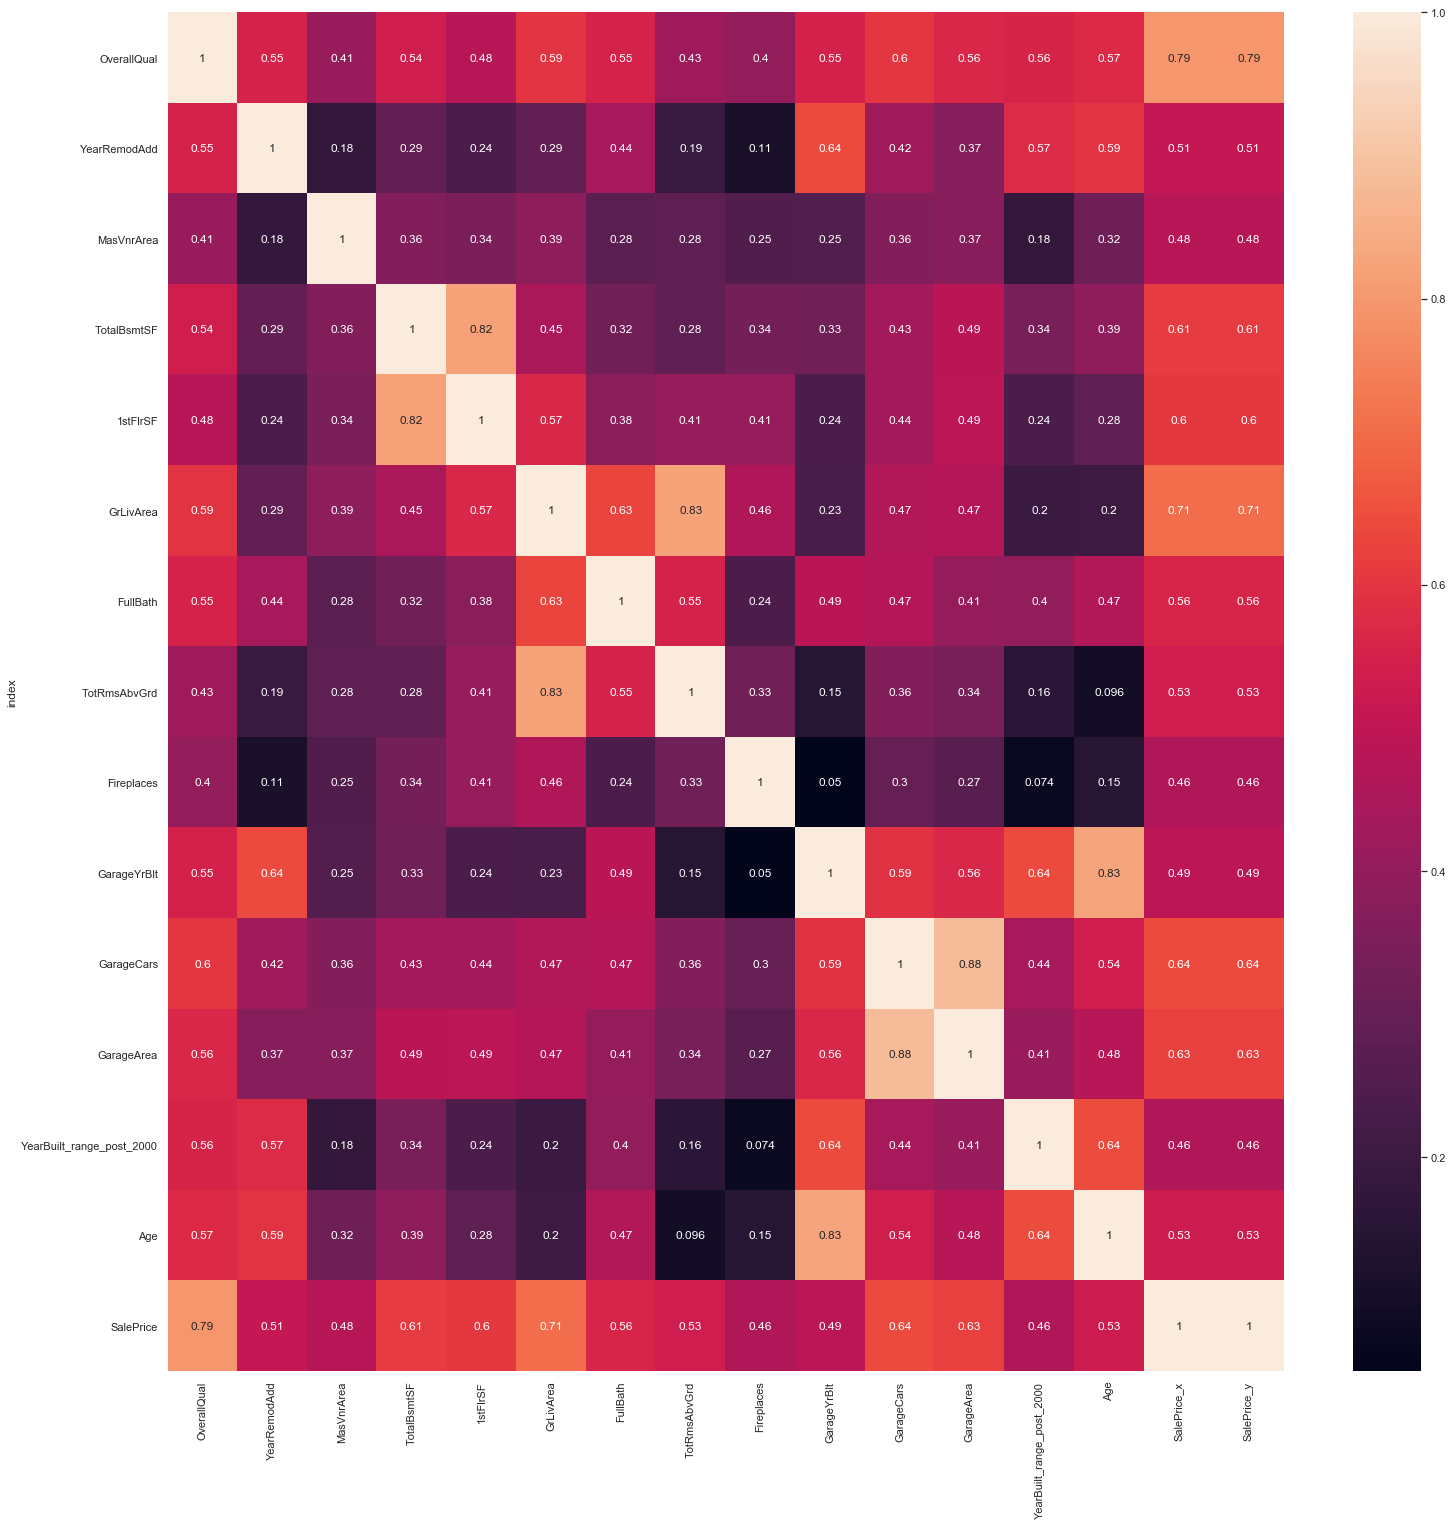

In [97]:
sns.set(rc={'figure.figsize':(25,25)})

ax = sns.heatmap(abs(corr_mat_plot), annot=True)

## 4.2 Boruta Feature Selection

In [98]:
X_train = df_train.copy()[correlated_cols].drop("SalePrice", axis=1).interpolate(method='ffill')
Y_train = df_train.copy()["SalePrice"]

In [99]:
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = X_train.values
y = Y_train.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=10, random_state=1)

# find all relevant features - 5 features should be selected
#feat_selector.fit(X, y)

# check selected features - first 5 features are selected
#feat_selector.support_

# check ranking of features
#feat_selector.ranking_

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)

In [100]:
#feat_selector.support_

In [101]:
#X_train.columns[feat_selector.support_]

In [102]:
#df_boruta = df_train[[X_train.columns[feat_selector.support_][0], 'SalePrice']]

In [103]:
#df_boruta.head()

# 5. Prediction

## Random Forest

In [104]:
X_train = df_train.copy().interpolate(method='ffill')[correlated_cols].drop("SalePrice", axis=1)
Y_train = df_train["SalePrice"]
correlated_cols.remove('SalePrice')
X_test  = df_test.copy()[correlated_cols].interpolate()
X_train.shape, Y_train.shape, X_test.shape

((1457, 14), (1457,), (1459, 14))

In [105]:
X_train.isna().interpolate().sum()

OverallQual                  0
YearRemodAdd                 0
MasVnrArea                   0
TotalBsmtSF                  0
1stFlrSF                     0
GrLivArea                    0
FullBath                     0
TotRmsAbvGrd                 0
Fireplaces                   0
GarageYrBlt                  0
GarageCars                   0
GarageArea                   0
YearBuilt_range_post_2000    0
Age                          0
dtype: int64

In [106]:
X_train.isna().sum()

OverallQual                  0
YearRemodAdd                 0
MasVnrArea                   0
TotalBsmtSF                  0
1stFlrSF                     0
GrLivArea                    0
FullBath                     0
TotRmsAbvGrd                 0
Fireplaces                   0
GarageYrBlt                  0
GarageCars                   0
GarageArea                   0
YearBuilt_range_post_2000    0
Age                          0
dtype: int64

In [107]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [108]:
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.38

# XGBoost

model = xgboost.train({"learning_rate": 0.5}, xgboost.DMatrix(X_train, label=Y_train), 10)

fit model no training data
model = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train[['OverallQual', 'YearBuilt']], Y_train, verbose=True)

print(model)

xgb_model = XGBRegressor().fit(X_train[['OverallQual', 'YearBuilt']], Y_train)
predictions = xgb_model.predict(X_test)
actuals = Y_test
print(mean_squared_error(actuals, predictions))

# 7. Submit results

In [109]:
submission = pd.DataFrame({ "Id": df_test["Id"], "SalePrice": Y_pred
                          }).set_index('Id')

In [110]:
submission.to_csv('submission.csv')

In [111]:
---

SyntaxError: invalid syntax (<ipython-input-111-29e0c3615294>, line 1)

# 8. Explain model

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)

In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values)

In [ ]:
shap.dependence_plot(0, shap_values, X_train)